In [1]:
import nfl_data_py as nfl
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
pbp = nfl.import_pbp_data(years=[2023, 2022, 2021, 2020, 2019, 2018])

2022 done.
2021 done.
2020 done.
2019 done.
2018 done.
Downcasting floats.


In [3]:
pbp.describe()

,play_id,week,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,quarter_end,drive,sp,qtr,...,xyac_success,xyac_fd,xpass,pass_oe,defenders_in_box,number_of_pass_rushers,n_offense,n_defense,ngs_air_yards,time_to_throw
count,241431.000000,241431.000000,224393.000000,241325.000000,241325.000000,241325.000000,241431.000000,239469.000000,241431.000000,241431.000000,...,85128.000000,85128.000000,183951.000000,179148.000000,180858.000000,105354.000000,239909.000000,239909.000000,91099.000000,93746.000000
mean,2120.604736,9.632135,49.006908,410.398590,808.005859,1706.823486,0.017384,11.599981,0.075218,2.566866,...,0.784704,0.585531,0.627165,-0.542460,6.359530,4.220248,10.229679,10.224060,8.045242,2.764625
std,1242.750977,5.441898,24.363777,282.293884,560.912903,1059.757202,0.130540,6.704293,0.264005,1.132224,...,0.249565,0.355742,0.240063,41.994518,1.074871,0.888994,2.834958,2.835082,9.937805,1.029140
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.017248,0.007914,0.010774,-99.512955,0.000000,0.000000,0.000000,0.000000,-17.549999,0.299000
25%,1049.000000,5.000000,31.000000,146.000000,276.000000,785.000000,0.000000,6.000000,0.000000,2.000000,...,0.566464,0.243039,0.456132,-41.852921,6.000000,4.000000,11.000000,11.000000,1.640000,2.102000
50%,2107.000000,10.000000,51.000000,391.000000,794.000000,1800.000000,0.000000,11.000000,0.000000,3.000000,...,0.984879,0.492420,0.597796,4.183084,6.000000,4.000000,11.000000,11.000000,5.440000,2.602000
75%,3160.000000,14.000000,70.000000,655.000000,1291.000000,2600.000000,0.000000,17.000000,0.000000,4.000000,...,1.000000,0.999154,0.855291,33.947552,7.000000,5.000000,11.000000,11.000000,12.810000,3.203000
max,5921.000000,22.000000,99.000000,900.000000,1800.000000,3600.000000,1.000000,38.000000,1.000000,5.000000,...,1.000000,1.000000,0.997902,97.995056,11.000000,10.000000,20.000000,22.000000,65.000000,14.281000


In [4]:
cols_to_keep = [
    'home_team', # which team is the home team
    'game_id', # contains the year which will be important
    'season_type', # Reg or postseason game
    'week', # What week in the regular season
    'posteam', # team that has possession
    'posteam_type', # whether they are home or away
    'defteam', # defending team
    'yardline_100', # how many yards away from endzone are we?
    'quarter_seconds_remaining', # seconds left in the quarter
    'half_seconds_remaining',
    'game_seconds_remaining', # seconds left in game
    'game_half', # half1, half2, or overtime
    'drive' , # the drive number of the game
    'down' , # this will be crucial. I only want to look at 4th down plays
    'goal_to_go', # binary: is it a goal to go situation
    'ydstogo' , # this could be the most important feature
    'ydsnet', # length of the drive to this point
    
    'play_type', # pass, run, no_play, kickoff, punt, xp, fg, qb kneel, qb spike
    'run_location', # this will not be used to predict.
    'pass_location', 
    'pass_length',
    
    'no_huddle', # binary
    'posteam_timeouts_remaining',
    'defteam_timeouts_remaining',
    'posteam_score',
    'defteam_score',
    'score_differential',
    
    # probabilities of opponents scoring
    'no_score_prob', # Predicted probability of no score occurring for the rest of the half based on the expected points model.
    'opp_fg_prob', # for next drive
    'opp_td_prob', 
    
    # probabilities of possessing team scoring
    'fg_prob', # fg for this drive
    'td_prob',
    
    'ep', # expected points for play
    'epa', # expected points added 
    
    'wp', # win probability at start of play
    'vegas_wp',
    'wpa', # win probability added
    'vegas_wpa', # vegas's wpa
    
    'sack', # was the play a sack
    
    'fixed_drive', # driver number
    'drive_play_count',
    'drive_time_of_possession',
    
    'spread_line', # The closing spread line for the game. A positive number means the home team was favored by that many points, a negative number means the away team was favored by that many points

    'temp', # temperature at stadium
    'wind', # wind speed
    
    'passer', #name of qb
    'rusher', # name of rb
    'receiver', # name of receiver
    
]

In [5]:
cols = ['wp', 'ydstogo', 'ydsnet','game_seconds_remaining', 'play_type', 'score_differential', 'td_prob', 'fg_prob', 'goal_to_go', 'yardline_100']
fourth_down = pbp[pbp['down'] == 4][cols]


In [6]:
fourth_down = fourth_down.dropna(subset=['play_type'])
fourth_down.drop(fourth_down[fourth_down['play_type'] == 'no_play'].index, inplace=True)
fourth_down.drop(fourth_down[fourth_down['play_type'] == 'qb_kneel'].index, inplace=True)



In [19]:
fourth_down['play_type'].value_counts()

punt          11038
field_goal     4726
pass           2170
run            1300
Name: play_type, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



y = fourth_down['play_type']
X = fourth_down.drop('play_type', axis=1)
X.head()

,wp,ydstogo,ydsnet,game_seconds_remaining,score_differential,td_prob,fg_prob,goal_to_go,yardline_100
6,0.488053,15.0,14.0,3533.0,0.0,0.280699,0.134732,0.0,64.0
14,0.473737,1.0,21.0,3296.0,0.0,0.293420,0.183629,0.0,51.0
21,0.459853,9.0,7.0,3132.0,0.0,0.203208,0.127246,0.0,82.0
25,0.461181,9.0,1.0,3068.0,0.0,0.208359,0.142706,0.0,65.0
32,0.581563,3.0,7.0,2899.0,0.0,0.006278,0.983987,0.0,6.0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# wp ydstogo ydsnet game_seconds_remaining score_differential td_prob fg_prob goal_to_go yardline_100
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

feature_weights = [7.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0]

print(X_train_scaled.shape)
X_train_weighted = X_train_scaled * feature_weights
X_test_weighted = X_test_scaled * feature_weights

(17308, 9)


Classification Report:
               precision    recall  f1-score   support

  field_goal       0.91      0.98      0.94       504
        pass       0.80      0.53      0.63       234
        punt       0.91      0.99      0.95      1059
         run       0.75      0.36      0.49       127

    accuracy                           0.89      1924
   macro avg       0.84      0.72      0.75      1924
weighted avg       0.88      0.89      0.88      1924
 <class 'str'>


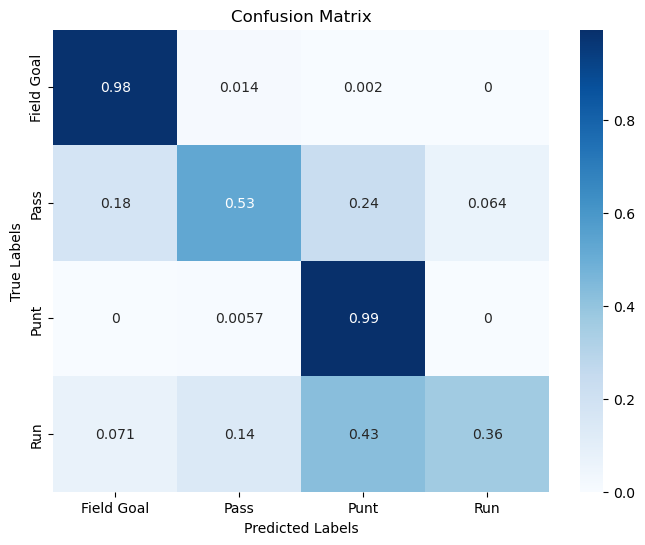

In [9]:
# Train the k-NN model
knn_classifier = KNeighborsClassifier(n_neighbors=25)
knn_classifier.fit(X_train_weighted, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_weighted)
proba = knn_classifier.predict_proba(X_test_weighted)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

print("Classification Report:\n", report ,type(report))

class_labels = ["Field Goal","Pass", 'Punt' , "Run"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_2085/3085316150.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proba_df[column], hist=False, kde_kws={'shade': True}, label=column)
/Users/lucasderr/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_2085/3085316150.py:3: UserWarning: 

`distplot` is a deprecated function and wil

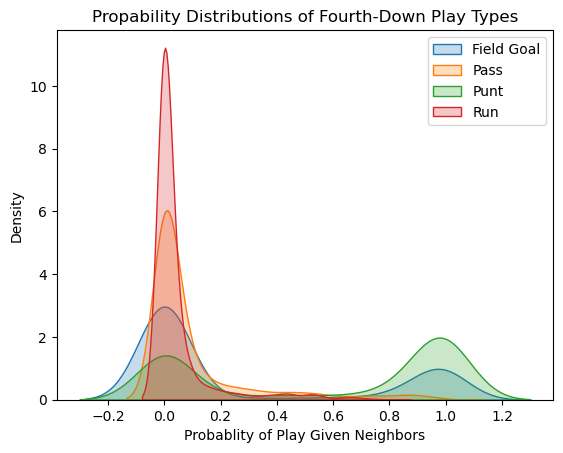

In [10]:
proba_df = pd.DataFrame(proba, columns=class_labels)
for column in proba_df.columns:
    sns.distplot(proba_df[column], hist=False, kde_kws={'shade': True}, label=column)

plt.title('Propability Distributions of Fourth-Down Play Types')
plt.xlabel('Probablity of Play Given Neighbors')
plt.ylabel('Density')
plt.legend()
plt.show()

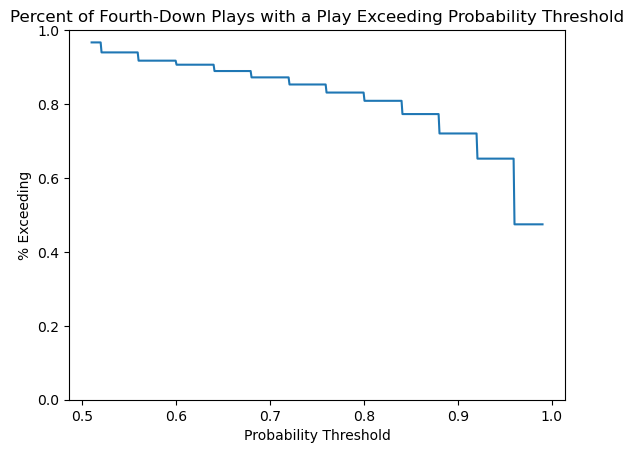

In [11]:
threshes = np.linspace(0.51, 0.99, 500)
percentages = []

for thresh in threshes:
    thresh_exceeded_percent = np.sum(np.any(proba > thresh, axis=1)) / len(proba)
    percentages.append(thresh_exceeded_percent)

sns.lineplot(x=threshes, y=percentages)
plt.ylim(0, 1)
plt.xlabel("Probability Threshold")
plt.ylabel("% Exceeding")
plt.title("Percent of Fourth-Down Plays with a Play Exceeding Probability Threshold")
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

feature_weights = [7.0, 1.0, 1.0, 5.0, 5.0, 1.0, 1.0, 1.0, 1.0]
X_train_weighted = X_train_scaled * feature_weights
X_test_weighted = X_test_scaled * feature_weights

In [13]:
ks = np.linspace(1, 200, 200)
reports = []

for i,k in enumerate(ks):
    print(f"{round(i/200*100)}%", end="\r")
    knn_classifier = KNeighborsClassifier(n_neighbors = int(k))
    knn_classifier.fit(X_train_weighted, y_train)

    y_pred = knn_classifier.predict(X_test_weighted)
    report = classification_report(y_pred, y_test,output_dict=True)
    
    reports.append(report)
    
reports

[{'field_goal': {'precision': 0.9781746031746031,
   'recall': 0.9572815533980582,
   'f1-score': 0.9676153091265947,
   'support': 515.0},
  'pass': {'precision': 0.5811965811965812,
   'recall': 0.7046632124352331,
   'f1-score': 0.6370023419203746,
   'support': 193.0},
  'punt': {'precision': 0.9669499527856469,
   'recall': 0.9317561419472248,
   'f1-score': 0.9490268767377202,
   'support': 1099.0},
  'run': {'precision': 0.49606299212598426,
   'recall': 0.5384615384615384,
   'f1-score': 0.516393442622951,
   'support': 117.0},
  'accuracy': 0.8918918918918919,
  'macro avg': {'precision': 0.7555960323207038,
   'recall': 0.7830406115605136,
   'f1-score': 0.7675094926019101,
   'support': 1924.0},
  'weighted avg': {'precision': 0.9026238196445047,
   'recall': 0.8918918918918919,
   'f1-score': 0.8963939223037778,
   'support': 1924.0}},
 {'field_goal': {'precision': 0.9940476190476191,
   'recall': 0.9192660550458716,
   'f1-score': 0.9551954242135368,
   'support': 545.0},


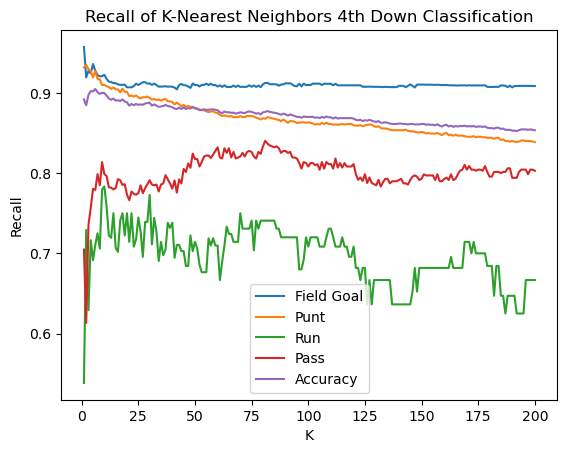

In [14]:
field_goal_precision = [x['field_goal']['recall'] for x in reports]
punt_precision = [x['punt']['recall'] for x in reports]
pass_precision = [x['pass']['recall'] for x in reports]
run_precision = [x['run']['recall'] for x in reports]
accuracy = [x['accuracy'] for x in reports]

plt.plot(ks, field_goal_precision, label="Field Goal")
plt.plot(ks, punt_precision, label="Punt")
plt.plot(ks, run_precision, label='Run')
plt.plot(ks, pass_precision, label="Pass")
plt.plot(ks, accuracy, label="Accuracy")


plt.title('Recall of K-Nearest Neighbors 4th Down Classification')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()

plt.show()

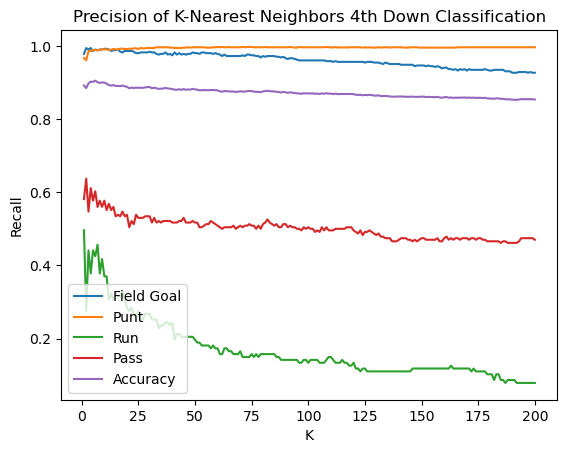

In [15]:
field_goal_precision = [x['field_goal']['precision'] for x in reports]
punt_precision = [x['punt']['precision'] for x in reports]
pass_precision = [x['pass']['precision'] for x in reports]
run_precision = [x['run']['precision'] for x in reports]
accuracy = [x['accuracy'] for x in reports]


plt.plot(ks, field_goal_precision, label="Field Goal")
plt.plot(ks, punt_precision, label="Punt")
plt.plot(ks, run_precision, label="Run")
plt.plot(ks, pass_precision,label="Pass")
plt.plot(ks, accuracy, label="Accuracy")


plt.title('Precision of K-Nearest Neighbors 4th Down Classification')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.show()

Precision: of all positive predictions, how many are correct?
 - when punting is predicted by the model, how often is that prediction correct?

Recall: of all positive labels, how many are predicted correctly?
 - when punting is the correct answer, how often is it correct?

      Iter       Train Loss   Remaining Time 
         1           0.9084           13.23s
         2           0.7898           13.15s
         3           0.6996           12.81s
         4           0.6283           12.75s
         5           0.5702           12.57s
         6           0.5219           12.60s
         7           0.4802           12.40s
         8           0.4457           12.27s
         9           0.4161           12.14s
        10           0.3902           12.02s
        20           0.2537           10.57s
        30           0.2045            9.26s
        40           0.1801            7.95s
        50           0.1659            6.62s
        60           0.1574            5.29s
        70           0.1515            3.96s
        80           0.1464            2.64s
        90           0.1428            1.32s
       100           0.1396            0.00s
Classification Report:
               precision    recall  f1-score   support

  field_goal       0

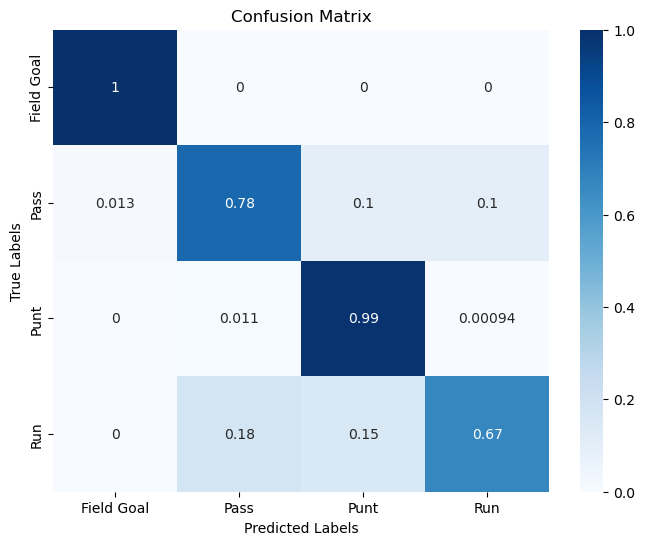

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

y = fourth_down['play_type']
X = fourth_down.drop('play_type', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

gb = GradientBoostingClassifier(verbose=1)
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)
proba = gb.predict_proba(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix / conf_matrix.sum(axis=1, keepdims=True)

print("Classification Report:\n", report ,type(report))

class_labels = ["Field Goal","Pass", 'Punt' , "Run"]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

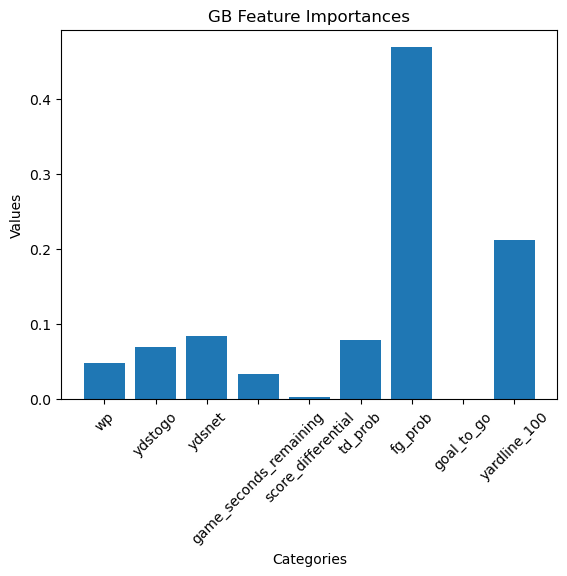

In [17]:

# Creating the bar plot
plt.bar(X.columns, gb.feature_importances_)

# Adding title and labels
plt.title('GB Feature Importances')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.xticks(rotation=45)

# Display the plot
plt.show()

/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_2085/3085316150.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(proba_df[column], hist=False, kde_kws={'shade': True}, label=column)
/Users/lucasderr/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_2085/3085316150.py:3: UserWarning: 

`distplot` is a deprecated function and wil

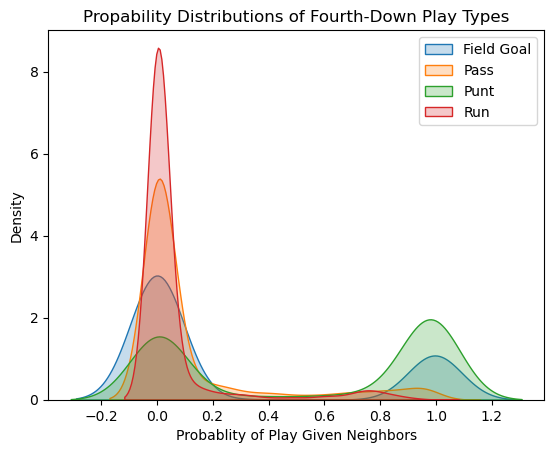

In [18]:
proba_df = pd.DataFrame(proba, columns=class_labels)
for column in proba_df.columns:
    sns.distplot(proba_df[column], hist=False, kde_kws={'shade': True}, label=column)

plt.title('Propability Distributions of Fourth-Down Play Types')
plt.xlabel('Probablity of Play Given Neighbors')
plt.ylabel('Density')
plt.legend()
plt.show()

In [19]:
def choice(row):
    return row.idxmax()

uncertain = proba_df[(proba_df["Field Goal"] < 0.9) & (proba_df["Pass"] < 0.9) & (proba_df["Run"] < 0.9) & (proba_df["Punt"] < 0.9)]

uncertain['choice'] = uncertain.apply(choice, axis=1)

uncertain['choice'].value_counts()


/var/folders/bh/bkzmld751m5fdgn8m3_kzfmc0000gn/T/ipykernel_2085/402088602.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uncertain['choice'] = uncertain.apply(choice, axis=1)


Pass          146
Punt          131
Run           105
Field Goal      5
Name: choice, dtype: int64

In [20]:
len(proba_df)

1924